In [1]:
# imports
import cv2
import tensorflow as tf
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [2]:
# versions
print(tf.__version__)
print(tf.config.experimental.list_physical_devices())


2.1.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
data_dir = "C:\\Users\\10\\Desktop\\Graduation project\\Datasets\\Dataset6\\26 classes\\Training"

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)

valid_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(200,200),
    batch_size=64,
    class_mode='sparse',
    subset='validation'
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(200,200),
    batch_size=64,
    class_mode='sparse',
    subset='training'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\10\\Desktop\\Graduation project\\Datasets\\Dataset6\\26 classes\\Testing",
    target_size=(200,200),
    batch_size=1,
    class_mode='sparse'
)


Found 3276 images belonging to 26 classes.
Found 13104 images belonging to 26 classes.
Found 1820 images belonging to 26 classes.


1.0


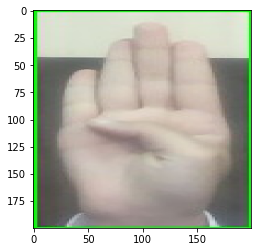

3.0


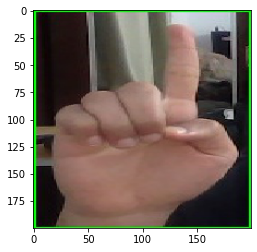

2.0


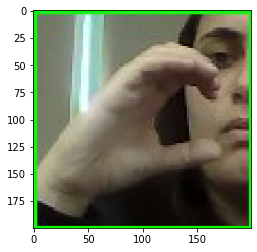

2.0


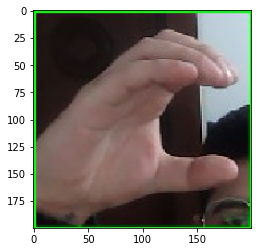

0.0


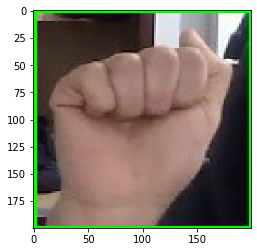

4.0


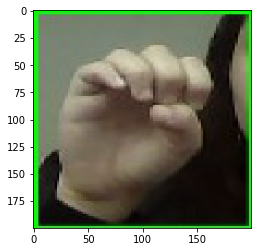

0.0


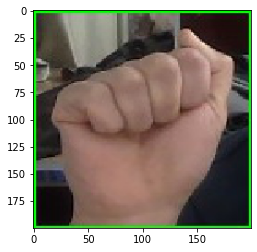

3.0


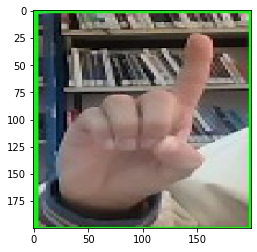

4.0


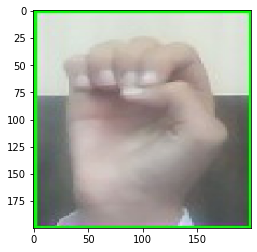

3.0


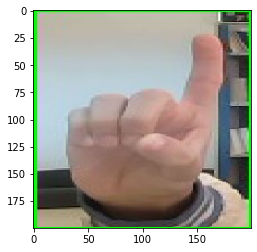

In [6]:
for i in range(10):
    plt.imshow(train_generator[0][0][i])
    
    print(train_generator[0][1][i])
    
    plt.show()

In [7]:
# Define the model
model = tf.keras.models.Sequential([
# # paper's model
    # First pair
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    # Second pair
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    # Third pair
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    # Fourth pair
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    # flatten
    tf.keras.layers.Flatten(),
    # DNN
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Use same settings
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 128)       0

In [8]:
# Training model
model.fit(
    train_generator,
    epochs=15,
    verbose=1,
    validation_data=valid_generator
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 40 steps, validate for 10 steps
Epoch 1/15
40/40 [==============================] - 49s 1s/step - loss: 1.5488 - accuracy: 0.2956 - val_loss: 1.3960 - val_accuracy: 0.4302
Epoch 2/15
40/40 [==============================] - 26s 653ms/step - loss: 0.8321 - accuracy: 0.7099 - val_loss: 0.6706 - val_accuracy: 0.7857
Epoch 3/15
40/40 [==============================] - 26s 655ms/step - loss: 0.1373 - accuracy: 0.9595 - val_loss: 0.2906 - val_accuracy: 0.9063
Epoch 4/15
40/40 [==============================] - 26s 655ms/step - loss: 0.0254 - accuracy: 0.9933 - val_loss: 0.2267 - val_accuracy: 0.9365
Epoch 5/15
40/40 [==============================] - 26s 655ms/step - loss: 0.0157 - accuracy: 0.9980 - val_loss: 0.2706 - val_accuracy: 0.9317
Epoch 6/15
40/40 [==============================] - 26s 653ms/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.1670 - val_accuracy: 0.9571
Epoch 7/15
40/40 [==============================] - 2

In [9]:
model.evaluate(test_generator)

  ...
    to  
  ['...']
6/6 [==============================] - 4s 614ms/step - loss: 0.0213 - accuracy: 0.9943


[0.021296857885317877, 0.9942857]

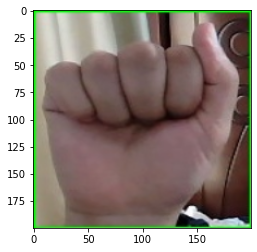

T


In [24]:
def prepareImg(img):
    size = 200
    img = cv2.resize(img,(size,size))
    return img.reshape(-1,size,size,3)

sample = cv2.imread("C:\\Users\\10\\Desktop\\cropped.jpg")
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
sample = prepareImg(sample)
plt.imshow(sample[0])
plt.show()
classes = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T"]
letter = classes[np.argmax(model.predict([sample]))]
print(letter)



In [10]:
model.save("Models/paper_AMC_0.h5")

In [4]:
# load saved model for testing
model_loaded = tf.keras.models.load_model("Models/paper_26C_0.h5")
model_loaded.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 198, 198, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 196, 196, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 96, 96, 128)       73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 94, 94, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 47, 47, 128)      

In [6]:
model_loaded.evaluate(test_generator)

  ...
    to  
  ['...']
1820/1820 [==============================] - 17s 9ms/step - loss: 0.5227 - accuracy: 0.9582


[0.5226869594814666, 0.95824176]

In [5]:
print(test_generator[0][1][1])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model_loaded.predict(test_generator)
test_values_i = []
for i in range(0,1820):
    test_values_i.append(test_generator[i][1][0])

# get predictions labels:
pred = model_loaded.predict(test_generator)
pred = np.argmax(pred,axis=-1)


cf = confusion_matrix(test_values_i,pred)



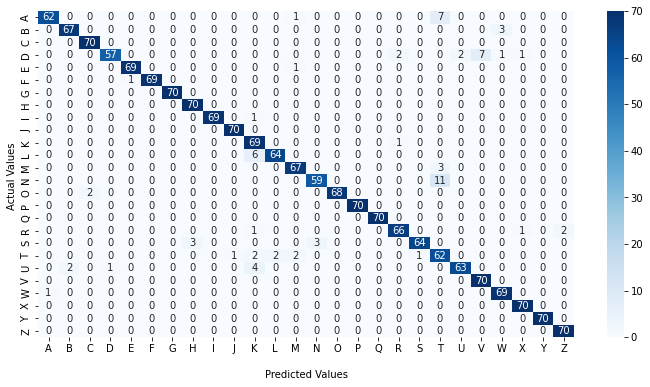

In [15]:
import seaborn as sns

labels = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
plt.figure(figsize=(12,6))
ax = sns.heatmap(cf, annot=True, cmap='Blues',xticklabels=labels, yticklabels=labels)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.show()